# **Chapter 2: Working in NetworkX**

## The Graph class - undirected networks

In [30]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)
# Import networkx package
import networkx as nx

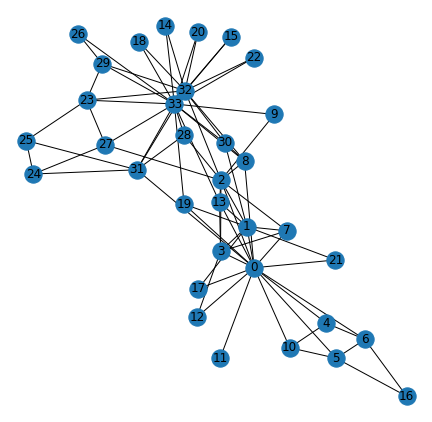

In [31]:
# Create variable to store karate club network
G = nx.karate_club_graph()
# Visualization layout is pre-calculated using spring_layout() and stored in variable karate_pos.
# spring_layout() places nodes closer together if they are connected by an edge
karate_pos = nx.spring_layout(G, k = 0.3)

nx.draw_networkx(G, karate_pos)

In [32]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [33]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

### Checking for nodes

In [34]:
# Check if Mr. Hi's node is part of the network
mr_hi = 0
mr_hi in G

True

In [35]:
# Graph class' has_node() method also checks whether nodes are part of a network
G.has_node(mr_hi)

True

In [36]:
# Returns false if the given value doesn't match any of the node IDs in Graph G
wild_goose = 1337
wild_goose in G

False

### Finding node neighbors

In [37]:
# The set of nodes connected to a particular node by an edge are called that node's neighbors and can be 
# found using the Graph class' neighbors() method. Returns an iterator, otherwise can see its neighbors if
# passed to list()
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [38]:
# Test whether a given edge exists in a network. In this case, assigns some club member to node ID 1,
# then checks if there is a connection between the two
member_id = 1
(mr_hi, member_id) in G.edges

True

In [39]:
G.has_edge(mr_hi, member_id)

True

## Adding attributes to nodes and edges

In [40]:
# Graph class allows for any number of attributes to be added to a node, which are then stored at 
# G.nodes[v] where v is the node's ID
# In this example, the club joined by member i is given by the ith element of the list
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]

In [41]:
# Add the member club information as an attribute to the nodes in the network. Note that the club 
# attribute has been set for all nodes
for node_id in G.nodes:
    G.nodes[node_id]["club"] = member_club[node_id]

In [42]:
# Automatically add attributes when adding a new node
G.add_node(11, club = 0)

In [43]:
# Check the value of a node's attribute individually
G.nodes[mr_hi]

{'club': 0}

In [44]:
G.nodes[member_id]

{'club': 0}

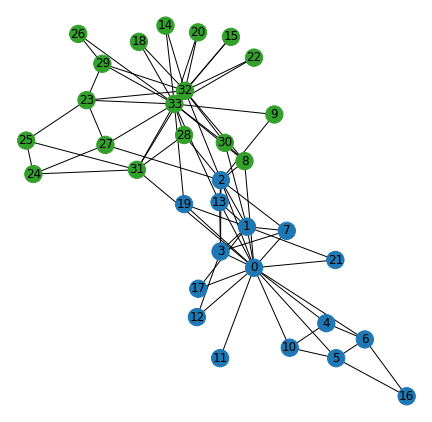

In [45]:
# Visualize different clubs by different colors
# Create a list of node colors by iterating through the graph's nodes and assigning a color based on their
# club attribute. Then, pass that list to the draw_networkx() function
node_color = [
    '#1f78b4' if G.nodes[v]["club"] == 0
    else '#33a02c' for v in G]
nx.draw_networkx(G, karate_pos, label = True, node_color = node_color)

In [46]:
# Some edges in the network connect members who joined the same club, others connect members from different
# clubs. The 'internal' attribute represents whether an edge is internal to a single club
# Iterate through all edges
for v, w in G.edges:
    # Compare `club` property of edge endpoints
    # Set edge `internal` property to True if they match
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v, w]["internal"] = True
    else:
        G.edges[v, w]["internal"] = False
# note: since Graph class represents an undirected network, attributes stored in G.edges[v, w], where v
#       and w are the node IDs of the edge endpoints, can also be accessed at G.edges[w, v]

In [47]:
# Refers to edges using a single e variable, which contains a pair of node IDs
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if not G.edges[e]["internal"]]

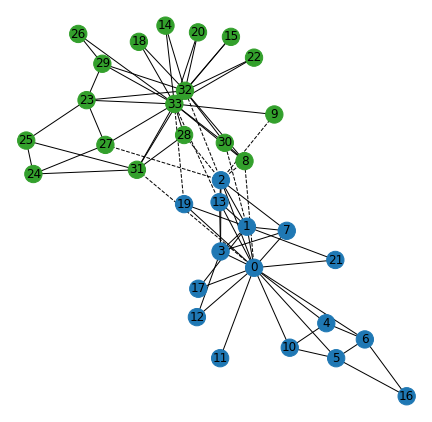

In [48]:
# NetworkX can only draw one line style at a time; multiple line styles requires nodes, edges, labels to 
# be drawn separately. First, draw the nodes and node labels, specifying node colors
nx.draw_networkx_nodes(G, karate_pos, node_color = node_color)
nx.draw_networkx_labels(G, karate_pos)

# Draw the internal and external edges, using 'style' parameter to draw the external edges as dashed lines
nx.draw_networkx_edges(G, karate_pos, edgelist = internal)
nx.draw_networkx_edges(G, karate_pos, edgelist = external, style = "dashed")

## Adding edge weights

In [49]:
# Tie strength property of an edge: tie strength increases with the number of neighbors that two nodes
# have in common. Motivated by the observation that closer friends tend to have more friends in common
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # Return size of the set intersection. Plus one because an edge weight of zero means no edge
    return 1 + len(v_neighbors & w_neighbors)

In [50]:
# Any edge attribute can be used as a weight. In this example, the weight is just called 'weight', and is
# set to the tie strength
# Calculate weight for each edge
for v, w in G.edges: 
    G.edges[v, w]["weight"] = tie_strength(G, v, w)
# Store weights in a list
edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges]

In [51]:
# Edge weights can be passed to spring_layout() to push strongly connected nodes even closer together
# karate_pos is used as the starting point of the new layout
weighted_pos = nx.spring_layout(G, pos = karate_pos, k = 0.3, weight = "weight")

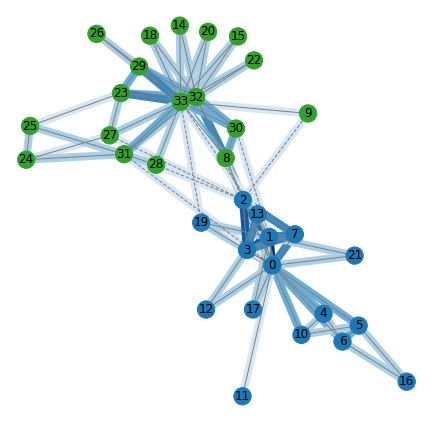

In [52]:
# Draw network with edge color determined by weight
# Edge weights are passed to draw_networkx(), where NetworkX then generates the colors by mapping them
# to colors using a color map. In this example, colors range from light blue (low weight) to dark blue
# (high weight)
# width = 8 draws the weighted edges with a width of 8 pixels
nx.draw_networkx(
    G, weighted_pos, width=8, node_color=node_color,
    edge_color=edge_weights, edge_vmin=0, edge_vmax=6, edge_cmap=plt.cm.Blues)

# Draw solid/dashed lines on top of internal/external edges
nx.draw_networkx_edges(G, weighted_pos, edgelist=internal, edge_color="gray")
nx.draw_networkx_edges(G, weighted_pos, edgelist=external, edge_color="gray", style="dashed")

## The DiGraph Class - when direction matters

In a directed network, a node can be connected to others by incoming and/or outgoing edges. 
  - Incoming edges connect a node to its predecessors
  - Outgoing edges connect a node to its successors

DiGraph class has a neighbors() method- returns an iterator of successor nodes only. Its successors() method 
does the same thing:

In [65]:
# list(G.neighbors(0)) == list(G.successors(0))

Find a node's predecessors:
  - note: a neighbor can be both a predecessor and a successor

In [66]:
# list(G.predecessors(0))

Node and edge attributes can be accessed exactly as they are in the Graph class, with some new ways
  - in_edges and out_edges attributes allow access to the same edges, but with guarantee that within
    each edge tuple,
     * the first node is the target (in_edges)
     * or the first node is the source (out_edges)
  

DiGraph class' to_undirected() method creates an undirected copy of itself
  - Returns a Graph
  - Undirected edge connects two nodes if a directed edge existed in either direction in the original 
    DiGraph
      * If 'reciprocal' parameter = True, an undirected edge will be created only if directed edges
        exist in both directions

In [67]:
# # Create undirected copies of G
# G_either = G.to_undirected()
# G_both = G.to_undirected(reciprocal=True)

# # Set up a figure
# plt.figure(figsize=(10,5))

# # Draw G_either on left
# plt.subplot(1, 2, 1)
# nx.draw_networkx(G_either, student_pos)

# # Draw G_both on right
# plt.subplot(1, 2, 2)
# nx.draw_networkx(G_both, student_pos)

## MultiGraph and MultiDiGraph - parallel edges

Graph class only allows one edge between a pair of nodes; if multiple parallel edges are needed,
MultiGraph and MultiDiGraph classes are provided
 - Any number of edges can be added between the same two endpoints

In [69]:
# Constructs the Königsberg network and adds the name of each bridge as an edge attribute
G = nx.MultiGraph()
G.add_edges_from([
    ("North Bank", "Kneiphof", {"bridge": "Krämerbrücke"}),
    ("North Bank", "Kneiphof", {"bridge": "Schmiedebrücke"}),
    ("North Bank", "Lomse",    {"bridge": "Holzbrücke"}),
    ("Lomse",      "Kneiphof", {"bridge": "Dombrücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Grüne Brücke"}),
    ("South Bank", "Kneiphof", {"bridge": "Köttelbrücke"}),
    ("South Bank", "Lomse",    {"bridge": "Hohe Brücke"})
])

[0, 1, 0, 0, 0, 1, 0]

In [72]:
# NetworkX assigns each edge a unique ID, which is stored in addition to its endpoints and data
# (attributes). Edges now represented by a 3-tuple, in which the first two elements contain the node
# IDs and the third containing the edge ID
list(G.edges)[0]

('North Bank', 'Kneiphof', 0)

In [73]:
G.edges['North Bank', 'Kneiphof', 0]

{'bridge': 'Krämerbrücke'}